本文是对pandas官网上《10 Minutes to pandas》的一个简单的翻译，原文在[这里](http://pandas.pydata.org/pandas-docs/stable/10min.html)。这篇文章是对pandas的一个简单的介绍，详细的介绍请参考：[Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)。习惯上，我们会按下面格式引入所需要的包：

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# 一、创建对象

可以通过[Data Structure Intro Section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)来查看有关该节内容的详细信息。

1. 可以通过传递一个list对象来创建一个Series，pandas会默认创建整型索引：

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

2.通过传递一个numpy array，时间索引以及列标签来创建一个DataFrame：

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


3.通过传递一个能够被转换成类似序列结构的字典对象来创建一个DataFrame：

In [10]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1, index=list(range(4)),dtype='float32'),
                    'D':np.array([3] * 4, dtype='int32'),
                    'E':pd.Categorical(['test','train', 'test','train']),
                    'F':'foo'
                   })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


4.查看不同列的数据类型：

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

5.使用Tab自动补全功能会自动识别所有的属性以及自定义的列

# 二、查看数据

详情请参阅：[Basics Section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

1.查看Frame中头部和尾部的行：

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


2.显示索引、列和底层的numpy数据：

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.38663281, -0.76451033,  0.60687389, -1.99679023],
       [ 0.07003598,  0.57449019,  0.55332677,  1.43130837],
       [-0.3178804 ,  1.30123968,  0.0962992 ,  0.94147191],
       [-1.14286485,  0.16489287,  0.92974336,  1.98964127],
       [ 0.19087035,  0.01495069,  1.38563824, -0.3200656 ],
       [ 1.15702348, -1.36611393, -0.13842339,  0.25381757]])

3.describe()函数对于数据的快速统计汇总：

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.057303,-0.012508,0.572243,0.383231
std,0.763808,0.948734,0.551823,1.425940
min,-1.142865,-1.366114,-0.138423,-1.996790
25%,-0.220901,-0.569645,0.210556,-0.176595
50%,0.130453,0.089922,0.580100,0.597645
75%,0.337692,0.472091,0.849026,1.308849
max,1.157023,1.301240,1.385638,1.989641


4.对数据的转置(tranverse):

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.386633,0.070036,-0.317880,-1.142865,0.190870,1.157023
B,-0.764510,0.574490,1.301240,0.164893,0.014951,-1.366114
C,0.606874,0.553327,0.096299,0.929743,1.385638,-0.138423
D,-1.996790,1.431308,0.941472,1.989641,-0.320066,0.253818


5.按轴进行排序

In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,-1.996790,0.606874,-0.764510,0.386633
2013-01-02,1.431308,0.553327,0.574490,0.070036
2013-01-03,0.941472,0.096299,1.301240,-0.317880
2013-01-04,1.989641,0.929743,0.164893,-1.142865
2013-01-05,-0.320066,1.385638,0.014951,0.190870
2013-01-06,0.253818,-0.138423,-1.366114,1.157023


6.按值进行排序

In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,1.157023,-1.366114,-0.138423,0.253818
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472


# 三、选择

虽然标准的Python/Numpy的选择和设置表达式都能够直接派上用场，但是作为工程使用的代码，我们推荐使用经过优化的pandas数据访问方式：.at,.iat,
.loc,.iloc和.ix详情请参阅[Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)
                                                 和[MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## 获取

1.选择一个单独的列，这将会返回一个Series，等同于df.A:

In [23]:
df

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


In [24]:
df['A']

2013-01-01    0.386633
2013-01-02    0.070036
2013-01-03   -0.317880
2013-01-04   -1.142865
2013-01-05    0.190870
2013-01-06    1.157023
Freq: D, Name: A, dtype: float64

2.通过[]进行选择，这将会对行进行切片

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,0.386633,-0.76451,0.606874,-1.996790
2013-01-02,0.070036,0.57449,0.553327,1.431308
2013-01-03,-0.317880,1.30124,0.096299,0.941472


In [26]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641


## 通过标签选择

1.使用标签来获取一个交叉的区域

In [27]:
df

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


In [28]:
df.loc[dates[0]]

A    0.386633
B   -0.764510
C    0.606874
D   -1.996790
Name: 2013-01-01 00:00:00, dtype: float64

2.通过标签来在多个轴上进行选择

In [29]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,0.386633,-0.764510
2013-01-02,0.070036,0.574490
2013-01-03,-0.317880,1.301240
2013-01-04,-1.142865,0.164893
2013-01-05,0.190870,0.014951
2013-01-06,1.157023,-1.366114


3.标签切片

In [30]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.070036,0.574490
2013-01-03,-0.317880,1.301240
2013-01-04,-1.142865,0.164893


4.对于返回的对象进行维度缩减

In [31]:
df.loc['20130102', ['A','B']]

A    0.070036
B    0.574490
Name: 2013-01-02 00:00:00, dtype: float64

5.获取一个标量

In [32]:
df.loc[dates[0], 'A']

0.3866328092416757

6.快速访问一个标量（与上一个方法等价）

In [33]:
df.at[dates[0], 'A']

0.3866328092416757

## 通过位置选择

1.通过传递数值进行位置选择（选择的是行）

In [34]:
df

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


In [35]:
df.iloc[3]

A   -1.142865
B    0.164893
C    0.929743
D    1.989641
Name: 2013-01-04 00:00:00, dtype: float64

2.通过数值进行切片，与numpy/python中的情况类似

In [36]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.142865,0.164893
2013-01-05,0.190870,0.014951


3.通过指定一个位置的列表，与numpy/python中的情况类似

In [37]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.070036,0.553327
2013-01-03,-0.317880,0.096299
2013-01-05,0.190870,1.385638


4.对行进行切片

In [38]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.070036,0.57449,0.553327,1.431308
2013-01-03,-0.317880,1.30124,0.096299,0.941472


5.对列进行切片

In [39]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.764510,0.606874
2013-01-02,0.574490,0.553327
2013-01-03,1.301240,0.096299
2013-01-04,0.164893,0.929743
2013-01-05,0.014951,1.385638
2013-01-06,-1.366114,-0.138423


6.获取特定的值

In [40]:
df.iloc[1,1]

0.5744901905520398

In [41]:
df.iat[1,1]

0.5744901905520398

## 布尔索引

In [42]:
df

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,-0.317880,1.301240,0.096299,0.941472
2013-01-04,-1.142865,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


1.使用一个单独列的值来选择数据：

In [43]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.386633,-0.764510,0.606874,-1.996790
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-05,0.190870,0.014951,1.385638,-0.320066
2013-01-06,1.157023,-1.366114,-0.138423,0.253818


2.使用where操作来选择数据：

In [44]:
df[df > 0]

,A,B,C,D
2013-01-01,0.386633,NaN,0.606874,NaN
2013-01-02,0.070036,0.574490,0.553327,1.431308
2013-01-03,NaN,1.301240,0.096299,0.941472
2013-01-04,NaN,0.164893,0.929743,1.989641
2013-01-05,0.190870,0.014951,1.385638,NaN
2013-01-06,1.157023,NaN,NaN,0.253818


3.使用isin()方法来过滤：

In [45]:
df2 = df.copy()

In [46]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [47]:
df2

,A,B,C,D,E
2013-01-01,0.386633,-0.764510,0.606874,-1.996790,one
2013-01-02,0.070036,0.574490,0.553327,1.431308,one
2013-01-03,-0.317880,1.301240,0.096299,0.941472,two
2013-01-04,-1.142865,0.164893,0.929743,1.989641,three
2013-01-05,0.190870,0.014951,1.385638,-0.320066,four
2013-01-06,1.157023,-1.366114,-0.138423,0.253818,three


In [48]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.31788,1.301240,0.096299,0.941472,two
2013-01-05,0.19087,0.014951,1.385638,-0.320066,four


## 设置

1.设置一个新的列：

In [49]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [50]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [51]:
df['F'] = s1

In [52]:
df

,A,B,C,D,F
2013-01-01,0.386633,-0.764510,0.606874,-1.996790,NaN
2013-01-02,0.070036,0.574490,0.553327,1.431308,1.0
2013-01-03,-0.317880,1.301240,0.096299,0.941472,2.0
2013-01-04,-1.142865,0.164893,0.929743,1.989641,3.0
2013-01-05,0.190870,0.014951,1.385638,-0.320066,4.0
2013-01-06,1.157023,-1.366114,-0.138423,0.253818,5.0


2.通过标签设置新的值：

In [53]:
df.at[dates[0],'A'] = 0

3.通过位置设置新的值：

In [54]:
df.iat[0,1] = 0

4.通过一个numpy数值设置一组新值：

In [57]:
len(df)

6

In [55]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述操作结果如下：

In [56]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.606874,5,NaN
2013-01-02,0.070036,0.574490,0.553327,5,1.0
2013-01-03,-0.317880,1.301240,0.096299,5,2.0
2013-01-04,-1.142865,0.164893,0.929743,5,3.0
2013-01-05,0.190870,0.014951,1.385638,5,4.0
2013-01-06,1.157023,-1.366114,-0.138423,5,5.0


5.设置新的值

In [58]:
df2 = df.copy()

In [62]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.606874,-5,NaN
2013-01-02,-0.070036,-0.574490,-0.553327,-5,-1.0
2013-01-03,-0.317880,-1.301240,-0.096299,-5,-2.0
2013-01-04,-1.142865,-0.164893,-0.929743,-5,-3.0
2013-01-05,-0.190870,-0.014951,-1.385638,-5,-4.0
2013-01-06,-1.157023,-1.366114,-0.138423,-5,-5.0


In [59]:
df2[df2 > 0] = -df2

In [60]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.606874,-5,NaN
2013-01-02,-0.070036,-0.574490,-0.553327,-5,-1.0
2013-01-03,-0.317880,-1.301240,-0.096299,-5,-2.0
2013-01-04,-1.142865,-0.164893,-0.929743,-5,-3.0
2013-01-05,-0.190870,-0.014951,-1.385638,-5,-4.0
2013-01-06,-1.157023,-1.366114,-0.138423,-5,-5.0


# 四、缺失值处理

在pandas中，使用np.nan来代替缺失值，这些值将默认不会包含在计算中，详情请参阅：[Missing Data Section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

In [63]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.606874,5,NaN
2013-01-02,0.070036,0.574490,0.553327,5,1.0
2013-01-03,-0.317880,1.301240,0.096299,5,2.0
2013-01-04,-1.142865,0.164893,0.929743,5,3.0
2013-01-05,0.190870,0.014951,1.385638,5,4.0
2013-01-06,1.157023,-1.366114,-0.138423,5,5.0


1.reindex()方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝：

In [64]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [65]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [66]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.606874,5,NaN,1.0
2013-01-02,0.070036,0.574490,0.553327,5,1.0,1.0
2013-01-03,-0.317880,1.301240,0.096299,5,2.0,NaN
2013-01-04,-1.142865,0.164893,0.929743,5,3.0,NaN


2.去掉包含缺失值的行：

In [67]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.070036,0.57449,0.553327,5,1.0,1.0


3.对缺失值进行填充：

In [68]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.606874,5,5.0,1.0
2013-01-02,0.070036,0.574490,0.553327,5,1.0,1.0
2013-01-03,-0.317880,1.301240,0.096299,5,2.0,5.0
2013-01-04,-1.142865,0.164893,0.929743,5,3.0,5.0


4.对数据进行布尔填充：

In [69]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 五、相关操作

详情请参与[Basic Section On Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### 统计（相关操作通常情况下不包括缺失值）

In [70]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.606874,5,NaN
2013-01-02,0.070036,0.574490,0.553327,5,1.0
2013-01-03,-0.317880,1.301240,0.096299,5,2.0
2013-01-04,-1.142865,0.164893,0.929743,5,3.0
2013-01-05,0.190870,0.014951,1.385638,5,4.0
2013-01-06,1.157023,-1.366114,-0.138423,5,5.0


1.执行描述性统计：

In [71]:
df.mean()

A   -0.007136
B    0.114910
C    0.572243
D    5.000000
F    3.000000
dtype: float64

2.在其他轴上进行相同的操作：

In [72]:
df.mean(1)

2013-01-01    1.401718
2013-01-02    1.439571
2013-01-03    1.615932
2013-01-04    1.590354
2013-01-05    2.118292
2013-01-06    1.930497
Freq: D, dtype: float64

3.对于拥有不同维度，需要对齐的对象进行操作，pandas会自动的沿着指定的维度进行广播

In [73]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [74]:
s = pd.Series([1,3,4,np.nan,6,8], index=dates).shift(2)

In [75]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    NaN
Freq: D, dtype: float64

### Apply

1.对数据应用函数：

In [78]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.606874,5,NaN
2013-01-02,0.070036,0.574490,0.553327,5,1.0
2013-01-03,-0.317880,1.301240,0.096299,5,2.0
2013-01-04,-1.142865,0.164893,0.929743,5,3.0
2013-01-05,0.190870,0.014951,1.385638,5,4.0
2013-01-06,1.157023,-1.366114,-0.138423,5,5.0


In [79]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.606874,5,NaN
2013-01-02,0.070036,0.574490,1.160201,10,1.0
2013-01-03,-0.247844,1.875730,1.256500,15,3.0
2013-01-04,-1.390709,2.040623,2.186243,20,6.0
2013-01-05,-1.199839,2.055573,3.571881,25,10.0
2013-01-06,-0.042815,0.689459,3.433458,30,15.0


In [80]:
df.apply(lambda x: x.max() - x.min())

A    2.299888
B    2.667354
C    1.524062
D    0.000000
F    4.000000
dtype: float64

### 频数统计

具体请参照: [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [82]:
s

0    0
1    0
2    6
3    5
4    2
5    3
6    2
7    6
8    2
9    2
dtype: int32

In [83]:
s.value_counts()

2    4
6    2
0    2
5    1
3    1
dtype: int64

### 字符串方法

Series对象在其str属性中配备了一组字符串处理方法，可以很容易的应用到数组中的每个元素，如下段代码所示。
更多详情请参考：[Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods)

In [84]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [85]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 六、合并

pandas提供了大量的方法能够轻松的对Series、DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。具体请参阅：[Merging Section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

### Concat

In [86]:
df = pd.DataFrame(np.random.randn(10, 4))

In [87]:
df

,0,1,2,3
0,-0.185631,0.290835,-0.457782,0.467207
1,1.415523,1.694694,-1.306985,1.049414
2,0.109817,-0.495336,-0.409282,-0.203610
3,0.397764,-0.574468,0.329085,-1.452041
4,-0.987020,-0.835218,-0.563764,1.291368
5,0.197714,-0.860849,-1.115435,-0.716618
6,0.405207,-0.630097,-1.492251,0.933828
7,0.078883,1.896740,-0.750019,-0.211459
8,0.024058,-2.159775,0.795340,-0.068052
9,0.386329,1.637350,1.359194,0.284931


In [88]:
pieces = [df[:3], df[3:7], df[7:]]

In [89]:
# break it into pieces
pieces

[          0         1         2         3
 0 -0.185631  0.290835 -0.457782  0.467207
 1  1.415523  1.694694 -1.306985  1.049414
 2  0.109817 -0.495336 -0.409282 -0.203610,
           0         1         2         3
 3  0.397764 -0.574468  0.329085 -1.452041
 4 -0.987020 -0.835218 -0.563764  1.291368
 5  0.197714 -0.860849 -1.115435 -0.716618
 6  0.405207 -0.630097 -1.492251  0.933828,
           0         1         2         3
 7  0.078883  1.896740 -0.750019 -0.211459
 8  0.024058 -2.159775  0.795340 -0.068052
 9  0.386329  1.637350  1.359194  0.284931]

In [90]:
type(pieces)

list

In [91]:
pd.concat(pieces)

,0,1,2,3
0,-0.185631,0.290835,-0.457782,0.467207
1,1.415523,1.694694,-1.306985,1.049414
2,0.109817,-0.495336,-0.409282,-0.203610
3,0.397764,-0.574468,0.329085,-1.452041
4,-0.987020,-0.835218,-0.563764,1.291368
5,0.197714,-0.860849,-1.115435,-0.716618
6,0.405207,-0.630097,-1.492251,0.933828
7,0.078883,1.896740,-0.750019,-0.211459
8,0.024058,-2.159775,0.795340,-0.068052
9,0.386329,1.637350,1.359194,0.284931


### Join类似于SQL类型的合并，具体请参阅：[Database Style Joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [92]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})

In [93]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [94]:
left

,key,lval
0,foo,1
1,foo,2


In [95]:
right

,key,rval
0,foo,4
1,foo,5


In [96]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append将一行连接到一个DataFrame上，具体请参阅[Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [97]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [98]:
df

,A,B,C,D
0,-0.247919,0.743378,-0.332463,-1.227421
1,-1.309986,-1.404077,0.855409,0.589514
2,-0.873589,-1.256506,-1.423444,0.681833
3,-0.485809,0.450620,0.963807,-1.064427
4,0.486585,0.214806,-0.492064,-0.151867
5,0.638092,2.178389,-2.155842,0.152928
6,1.320044,2.266866,0.491190,-2.458745
7,0.729340,-0.971806,1.198744,-1.927681


In [99]:
s = df.iloc[3]

In [100]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.247919,0.743378,-0.332463,-1.227421
1,-1.309986,-1.404077,0.855409,0.589514
2,-0.873589,-1.256506,-1.423444,0.681833
3,-0.485809,0.450620,0.963807,-1.064427
4,0.486585,0.214806,-0.492064,-0.151867
5,0.638092,2.178389,-2.155842,0.152928
6,1.320044,2.266866,0.491190,-2.458745
7,0.729340,-0.971806,1.198744,-1.927681
8,-0.485809,0.450620,0.963807,-1.064427


# 七、分组

对于“group by”操作，我们通常是指以下一个或多个操作步骤：
+ （Splitting）按照一些规则将数据分为不同的组
+ （Applying）对于每组数据分别执行一个函数
+ （Combining）将结果组合刀一个数据结构中
详情请参阅：[Grouping Section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [101]:
df = pd.DataFrame({
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    })

In [102]:
df

,A,B,C,D
0,foo,one,-0.356470,0.360681
1,bar,one,0.376530,-0.171957
2,foo,two,0.983412,1.356620
3,bar,three,0.648342,-0.253405
4,foo,two,0.356558,0.923867
5,bar,two,-0.443483,-1.038152
6,foo,one,0.840260,0.356336
7,foo,three,-0.296354,-0.526268


1.分组并对每个分组执行sum函数：

In [103]:
df.groupby('A').sum()

,C,D
A,,
bar,0.581389,-1.463514
foo,1.527407,2.471236


2.通过多个列进行分组形成一个层次索引，然后执行函数：

In [104]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.376530 -0.171957
    three  0.648342 -0.253405
    two   -0.443483 -1.038152
foo one    0.483790  0.717017
    three -0.296354 -0.526268
    two    1.339970  2.280488

# 八、Reshaping

详情请参阅[Hierachical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical)和[Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

### Stack

In [116]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [117]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [118]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [119]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [120]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [121]:
df2 = df[:4]

In [122]:
df2

A         B
first second                    
bar   one    -0.359112  1.320053
      two    -1.882604  0.997227
baz   one    -3.855058  0.014692
      two    -0.592265  1.018117

In [123]:
stacked = df2.stack()

In [124]:
stacked

first  second   
bar    one     A   -0.359112
               B    1.320053
       two     A   -1.882604
               B    0.997227
baz    one     A   -3.855058
               B    0.014692
       two     A   -0.592265
               B    1.018117
dtype: float64

In [125]:
type(stacked)

pandas.core.series.Series

In [126]:
stacked.unstack()

A         B
first second                    
bar   one    -0.359112  1.320053
      two    -1.882604  0.997227
baz   one    -3.855058  0.014692
      two    -0.592265  1.018117

In [127]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.359112 -1.882604
      B  1.320053  0.997227
baz   A -3.855058 -0.592265
      B  0.014692  1.018117

In [128]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.359112 -3.855058
       B  1.320053  0.014692
two    A -1.882604 -0.592265
       B  0.997227  1.018117

### 数据透视表，详情请参阅：[Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)

In [129]:
df = pd.DataFrame({
        'A': ['one', 'one', 'two', 'three'] * 3,
        'B': ['A', 'B', 'C'] * 4,
        'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D': np.random.randn(12),
        'E': np.random.randn(12)
    })

In [130]:
df

,A,B,C,D,E
0,one,A,foo,-0.545865,1.924384
1,one,B,foo,-0.053291,0.653302
2,two,C,foo,-0.505194,-0.039108
3,three,A,bar,0.135928,1.001558
4,one,B,bar,0.419323,1.139918
5,one,C,bar,-1.015480,-0.998569
6,two,A,foo,0.449688,-0.641829
7,three,B,foo,0.240647,-0.510110
8,one,C,foo,1.349185,-0.773073
9,one,A,bar,0.168223,0.443646


可以从这个数据中轻松的生成数据透视表：

In [131]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.168223 -0.545865
      B  0.419323 -0.053291
      C -1.015480  1.349185
three A  0.135928       NaN
      B       NaN  0.240647
      C -0.018163       NaN
two   A       NaN  0.449688
      B  0.375086       NaN
      C       NaN -0.505194

# 九、时间序列

pandas在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）。这种操作在金融领域非常常见。具体参考：[Time Series Section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [132]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [139]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [150]:
ts.head(10)

2012-01-01 00:00:00    185
2012-01-01 00:00:01    302
2012-01-01 00:00:02    201
2012-01-01 00:00:03    341
2012-01-01 00:00:04    250
2012-01-01 00:00:05    162
2012-01-01 00:00:06    462
2012-01-01 00:00:07    262
2012-01-01 00:00:08    149
2012-01-01 00:00:09     76
Freq: S, dtype: int32

In [149]:
new_ts = ts.resample('5s', how='sum')
new_ts

C:\Users\wxc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2012-01-01 00:00:00    1279
2012-01-01 00:00:05    1111
2012-01-01 00:00:10     863
2012-01-01 00:00:15     943
2012-01-01 00:00:20    1421
2012-01-01 00:00:25    1152
2012-01-01 00:00:30    2122
2012-01-01 00:00:35    1249
2012-01-01 00:00:40    1371
2012-01-01 00:00:45    1302
2012-01-01 00:00:50     755
2012-01-01 00:00:55    2012
2012-01-01 00:01:00    1056
2012-01-01 00:01:05    1422
2012-01-01 00:01:10    1652
2012-01-01 00:01:15     782
2012-01-01 00:01:20    1820
2012-01-01 00:01:25    1401
2012-01-01 00:01:30     951
2012-01-01 00:01:35    1366
Freq: 5S, dtype: int32

1.时区表示：

In [151]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [152]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [153]:
ts

2012-03-06   -0.726591
2012-03-07   -0.483617
2012-03-08   -0.439935
2012-03-09    1.091977
2012-03-10    1.367520
Freq: D, dtype: float64

In [154]:
ts_utc = ts.tz_localize('UTC')

In [156]:
ts_utc

2012-03-06 00:00:00+00:00   -0.726591
2012-03-07 00:00:00+00:00   -0.483617
2012-03-08 00:00:00+00:00   -0.439935
2012-03-09 00:00:00+00:00    1.091977
2012-03-10 00:00:00+00:00    1.367520
Freq: D, dtype: float64

2.时区转换：

In [157]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.726591
2012-03-06 19:00:00-05:00   -0.483617
2012-03-07 19:00:00-05:00   -0.439935
2012-03-08 19:00:00-05:00    1.091977
2012-03-09 19:00:00-05:00    1.367520
Freq: D, dtype: float64

# 十、Categorical

从0.15版本开始，pandas可以在DataFrame中支持Categorical类型的数据，详细介绍参考：[categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and [API Documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)

In [187]:
df = pd.DataFrame({
        'id':[1,2,3,4,5,6],
        'raw_grade':['a','b','b','a','a','e']
    })

1.将原始的grade转换为Categorical数据类型：

In [197]:
df['grade'] = df['raw_grade'].astype('category', ordered=True)

In [198]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a < b < e]

2.将Categorical类型数据重命名为更有意义的名称：

In [199]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

3.对类别进行重新排序，增加缺失的类别：

In [200]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

In [201]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad < bad < medium < good < very good]

4.排序是按照Categorical的顺序进行的而不是按照字典顺序进行：

In [203]:
df.sort_values('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


5.对Categorical列进行排序时存在空的类别：

In [204]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 十一、画图

具体文档参考：[Plotting Docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

In [205]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [206]:
ts = ts.cumsum()

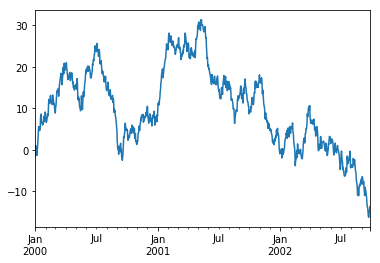

In [207]:
ts.plot()

对于DataFrame来说，plot是一种将所有列及其标签进行绘制的简便方法：

In [208]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [209]:
df = df.cumsum()

In [210]:
df

,A,B,C,D
2000-01-01,1.110462,-1.057161,0.603814,0.510942
2000-01-02,-0.254878,-1.334043,1.114364,0.802894
2000-01-03,0.654421,-0.542519,0.141968,0.650010
2000-01-04,1.099925,-1.386124,-1.021756,-0.853298
2000-01-05,1.465917,0.973620,-1.496278,-1.336777
2000-01-06,1.799886,1.280329,-2.444955,-1.759220
2000-01-07,2.864489,1.759882,-1.380810,-2.089434
2000-01-08,4.319111,0.566430,-0.606309,-2.584673
2000-01-09,4.209268,-0.263162,-1.174834,-2.331877
2000-01-10,3.443977,0.866722,0.463231,-2.528206


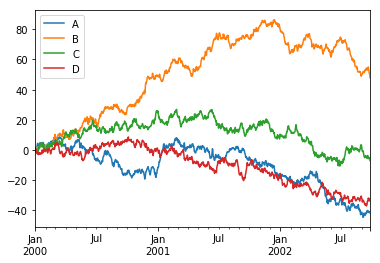

In [211]:
plt.figure;df.plot();plt.legend(loc='best')

# 导入和保存数据

### CSV，参考：[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

1.写入csv文件

In [212]:
df.to_csv('foo.csv')

2.从csv文件中读取：

In [213]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.110462,-1.057161,0.603814,0.510942
1,2000-01-02,-0.254878,-1.334043,1.114364,0.802894
2,2000-01-03,0.654421,-0.542519,0.141968,0.650010
3,2000-01-04,1.099925,-1.386124,-1.021756,-0.853298
4,2000-01-05,1.465917,0.973620,-1.496278,-1.336777
5,2000-01-06,1.799886,1.280329,-2.444955,-1.759220
6,2000-01-07,2.864489,1.759882,-1.380810,-2.089434
7,2000-01-08,4.319111,0.566430,-0.606309,-2.584673
8,2000-01-09,4.209268,-0.263162,-1.174834,-2.331877
9,2000-01-10,3.443977,0.866722,0.463231,-2.528206


### HDF5，参考：[HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

1.写入HDF5存储

In [214]:
df.to_hdf('foo.h5', 'df')

2.从HDF5存储中读取：

In [215]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,1.110462,-1.057161,0.603814,0.510942
2000-01-02,-0.254878,-1.334043,1.114364,0.802894
2000-01-03,0.654421,-0.542519,0.141968,0.650010
2000-01-04,1.099925,-1.386124,-1.021756,-0.853298
2000-01-05,1.465917,0.973620,-1.496278,-1.336777
2000-01-06,1.799886,1.280329,-2.444955,-1.759220
2000-01-07,2.864489,1.759882,-1.380810,-2.089434
2000-01-08,4.319111,0.566430,-0.606309,-2.584673
2000-01-09,4.209268,-0.263162,-1.174834,-2.331877
2000-01-10,3.443977,0.866722,0.463231,-2.528206
